In [1]:
import os
import numpy as np
from pypianoroll import Multitrack, Track
from matplotlib import pyplot as plt
import pypianoroll as ppr

In [2]:
dataset_path = '/Users/mac/Desktop/Brain/MuseGAN/training_data/lastfm_alternative_8b_phrase.npy'
dataset = np.load(dataset_path)

In [41]:
song0 = dataset[10]
song0.shape

(6, 4, 96, 84, 5)

In [42]:
# part 0 bar 0

# 6, 4, 96, 84, 5
# 24*96
p0_b0 = song0.reshape(2304, 84, 5)
p0_b0.shape

(2304, 84, 5)

In [43]:
programs = [0, 0, 24, 32, 48, 64, 80, 88]


tracks = []

#track_names = ['Drums', 'Piano', 'Guitar', 'Bass', 'String']
track_names = ['Drums', 'Piano', 'Guitar','Bass', 'Ensemble', 'Reed', 'Synth Lead', 'Synth Pad']

for i in range(5):
    tracks.append(p0_b0[:,:,i])

'''
Drums = p0_b0[:,:,0]
Piano = p0_b0[:,:,1]
Guitar = p0_b0[:,:,2]
Bass = p0_b0[:,:,3]
String = p0_b0[:,:,4]

Drums.shape
'''

'\nDrums = p0_b0[:,:,0]\nPiano = p0_b0[:,:,1]\nGuitar = p0_b0[:,:,2]\nBass = p0_b0[:,:,3]\nString = p0_b0[:,:,4]\n\nDrums.shape\n'

In [44]:
tracks[0].shape

(2304, 84)

In [45]:
# 需要添加一个步骤，将音域 (C1-C8) 补全到128
# 最低音 24
# Middle C 60
# 并且把二进制化的数字全部赋值为100，设定音量为100

padded_tracks = []

for i in range(5):
    temp_pr = np.zeros((len(tracks[i]),128))
    # 肯定存在简单写法
    for x in range(len(tracks[i])):
        for y in range(84):
            if tracks[0][x][y] == True:
                temp_pr[x][y+24] = 100
    padded_tracks.append(temp_pr)

padded_tracks = np.array(padded_tracks)

In [46]:
padded_tracks.shape

(5, 2304, 128)

In [47]:
music_tracks = []
for i in range(5):
    if i == 0:
        temp_track = Track(pianoroll=padded_tracks[i], program=programs[i], is_drum=True, name=track_names[i])
    else:
        temp_track = Track(pianoroll=padded_tracks[i], program=programs[i], is_drum=False, name=track_names[i])
    music_tracks.append(temp_track)

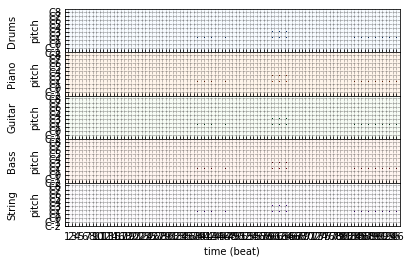

In [48]:
# Extend the piano-roll to demonstrate the usage of down beat array
# track.pianoroll = np.tile(track.pianoroll, (4, 1))
# downbeats = [0, 96, 192, 288]

# Create a `pypianoroll.Multitrack` instance
multitrack = Multitrack(tracks=music_tracks, tempo=120.0,
                        # downbeat=[0, 96, 192, 288], 
                        beat_resolution=24)

# Plot the multi-track piano-roll
fig, axs = multitrack.plot()
plt.show()

In [49]:
# Write the `pypianoroll.Multitrack` instance to a MIDI f
multitrack.write('/Users/mac/Desktop/test_ppr/test_5_tracks.mid')

In [ ]:
programs = [0, 0, 24, 32, 48, 64, 80, 88]
tracks = []
#track_names = ['Drums', 'Piano', 'Guitar', 'Bass', 'String']
track_names = ['Drums', 'Piano', 'Guitar','Bass', 'Ensemble', 'Reed', 'Synth Lead', 'Synth Pad']

In [ ]:
# read dataset
dataset_path = '/Users/mac/Desktop/Brain/MuseGAN/training_data/lastfm_alternative_8b_phrase.npy'
dataset = np.load(dataset_path)

In [ ]:
def ith_song_to_midi(dataset, track_num, programs, track_names, index, midi_dir, midi_name):
    now_song = dataset[index]
    now_song = now_song.reshape(6 * 4 * 96, 84, track_num)
    
    for i in range(track_num):
        tracks.append(now_song[:,:,i])
    
    padded_tracks = []

    for i in range(track_num):
        temp_pr = np.zeros((len(tracks[i]),128))
        # 肯定存在简单写法
        for x in range(len(tracks[i])):
            for y in range(84):
                if tracks[0][x][y] == True:
                    temp_pr[x][y+36] = 100
        padded_tracks.append(temp_pr)

    padded_tracks = np.array(padded_tracks)
    
    music_tracks = []
    for i in range(5):
        if i == 0:
            temp_track = Track(pianoroll=padded_tracks[i], program=programs[i], is_drum=True, name=track_names[i])
        else:
            temp_track = Track(pianoroll=padded_tracks[i], program=programs[i], is_drum=False, name=track_names[i])
    music_tracks.append(temp_track)
    
    multitrack = Multitrack(tracks=music_tracks, tempo=120.0,
                        # downbeat=[0, 96, 192, 288], 
                        beat_resolution=24)
    
    multitrack.write('/Users/mac/Desktop/test_ppr/test_5_tracks.mid')

In [ ]:
ith_song_to_midi(dataset = dataset, 
             track_num = 8, 
             programs = programs, 
             track_names = track_names, 
             index = 1,
             midi_dir = '/Users/mac/Desktop/test_ppr')